# ML Models - Random Forest, Decision Trees, SVM, Boosting
### Evelina Ramoskaite

In [42]:
# importing relevant libraries
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import itertools
import collections
import re

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score


import warnings
warnings.filterwarnings("ignore")

### For comparison purposes, we will use the google dataset. I manually rated each of the tweets for an entire day as neutral/negative/positive.

In [43]:
# Loading the Data

data = pd.read_csv('rated_GOOGL.csv')
data.columns

Index(['timestamp', 'tweet_text', 'all_hashtags', 'retweet_count',
       'tweet_created_at', ' username', 'followers_count', 'target'],
      dtype='object')

In [44]:
# Tweets
data.head(5)

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,target
0,5/3/2021 0:05,Today's Watchlist includes $GE $MFST $F $SL $M...,[],0,5/3/2021 0:05,microcapcompany,7491,neutral
1,5/3/2021 0:05,@1MainCapital I don’t think you can answer thi...,[],0,5/3/2021 0:05,retweettosender,1,negative
2,5/3/2021 0:16,China Says 33 Apps Break Rules in Gathering Us...,[],4,5/3/2021 0:16,smartertrader,48836,negative
3,5/3/2021 0:16,[Last 24 Hours] Stocks trending among elite #...,"['fintwit', 'investing', 'stocks', 'wallstreet...",0,5/3/2021 0:16,ffinapse,104,positive
4,5/3/2021 0:17,Mega cap stock and option trading model subscr...,[],0,5/3/2021 0:17,ProfectuSystems,422,neutral


# Data Cleaning 

In [45]:
#preprocess tweets

data.tweet_text =data.tweet_text.str.lower()  #tranform tweet col to lower case

#Remove handlers

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove hashtags

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("#", "", x))

# Remove $

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("$", "", x))

#remove all single characters

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))




# 80/20 train/test split

In [46]:

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

data_train, data_test = train_test_split(data, test_size=0.2)

cv = CountVectorizer(tokenizer=word_tokenize, token_pattern=None)
cv.fit(data_train.tweet_text)

xtrain = cv.transform(data_train.tweet_text)
xtest = cv.transform(data_test.tweet_text)

# Setting the target variables
ytrain = data_train.target
ytest = data_test.target


# Model Optimization (Grid Search)

In [47]:
from sklearn.model_selection import RandomizedSearchCV
def modelOptimization(clf,grid,x,y):
        #Input is the classifier,grid,x,and y.
        #performs Random Grid Search Using 5-fold Cross Validation
        #outputs the best model and accuracy
        clfmodel = RandomizedSearchCV(estimator = clf,n_iter=200,param_distributions = grid,scoring='accuracy', cv=5,verbose =1, random_state=2021,n_jobs=-1)
        clfmodel.fit(x,y)
        print('Model Best Score: \n',clfmodel.best_score_)
        print('Model Best Parameters: \n',clfmodel.best_params_)

# Model Evaluation 

In [48]:
# Metrics Report
from sklearn.metrics import confusion_matrix

def metrics_report(model):
    """ Outputs the Accuracy rate of the model on the test set, along with a confusion matrix"""
    # Fitting the model
    model.fit(xtrain, ytrain)
    
    # Getting model predictions of the target class
    preds = model.predict(xtest)
    
    # creating confusion matrix
    confusion_matrix =  pd.crosstab(index=ytest, columns=preds.ravel(), rownames=['Expected'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
    plt.title("Confusion Matrix", fontsize = 40)
    plt.show()
    
    # Getting accuracy score
    print (metrics.classification_report(ytest,preds,digits=4))
    accuracy = accuracy_score(data_test.target.values, preds)
    print(f"Accuracy = {accuracy}")

## Logistic Regression

In [8]:
# Hyperparameter Tuning

In [9]:
# Cross-Validated Grid Search
from sklearn.model_selection import GridSearchCV

loggrid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()

modelOptimization(logreg,loggrid,xtrain,ytrain)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s


Model Best Score: 
 0.666711895070104
Model Best Parameters: 
 {'penalty': 'l2', 'C': 1000.0}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.3s finished


In [32]:
# Best Logistic Regression Model
lrmodel = LogisticRegression(penalty = 'l2',C=1000)


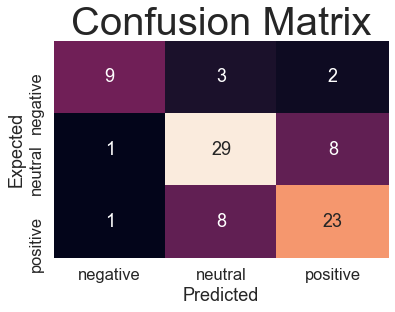

              precision    recall  f1-score   support

    negative     0.8182    0.6429    0.7200        14
     neutral     0.7250    0.7632    0.7436        38
    positive     0.6970    0.7188    0.7077        32

    accuracy                         0.7262        84
   macro avg     0.7467    0.7083    0.7238        84
weighted avg     0.7299    0.7262    0.7260        84

Accuracy = 0.7261904761904762


In [39]:
metrics_report(lrmodel)

### Logistic regression had the highest accuracy rate, surpassing the performance of much more complicated models.

### SVM

In [12]:
from sklearn import svm
svcgrid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly']} 
svc = svm.SVC()

modelOptimization(svc,svcgrid,xtrain,ytrain)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Model Best Score: 
 0.6666666666666666
Model Best Parameters: 
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}


[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    1.8s finished


In [42]:
# Best Model
svcmodel = svm.SVC(kernel='rbf',gamma=0.01,C=10)


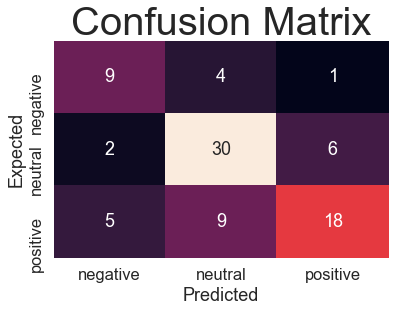

              precision    recall  f1-score   support

    negative     0.5625    0.6429    0.6000        14
     neutral     0.6977    0.7895    0.7407        38
    positive     0.7200    0.5625    0.6316        32

    accuracy                         0.6786        84
   macro avg     0.6601    0.6649    0.6574        84
weighted avg     0.6837    0.6786    0.6757        84

Accuracy = 0.6785714285714286


In [43]:
# Evaluation
metrics_report(svcmodel)

## Decision Tree

In [15]:
from sklearn import tree
rfgrid = random_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
rf = tree.DecisionTreeClassifier()
modelOptimization(rf,rfgrid,xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Model Best Score: 
 0.6308005427408412
Model Best Parameters: 
 {'max_depth': 120, 'criterion': 'entropy'}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.4s finished


In [44]:
# Best decision tree
dtmodel = tree.DecisionTreeClassifier(max_depth=120, criterion = 'entropy')


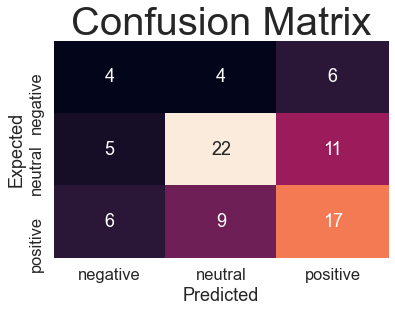

              precision    recall  f1-score   support

    negative     0.2667    0.2857    0.2759        14
     neutral     0.6286    0.5789    0.6027        38
    positive     0.5000    0.5312    0.5152        32

    accuracy                         0.5119        84
   macro avg     0.4651    0.4653    0.4646        84
weighted avg     0.5193    0.5119    0.5149        84

Accuracy = 0.5119047619047619


In [45]:
# Evaluation
metrics_report(dtmodel)

## Random Forest 

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfgrid = random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}
rf = RandomForestClassifier()
modelOptimization(rf,rfgrid,xtrain,ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished


Model Best Score: 
 0.6576209859791949
Model Best Parameters: 
 {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False}


In [46]:
# Best Random Forest Model
rfmodel = RandomForestClassifier(n_estimators=180,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=90,bootstrap=False)

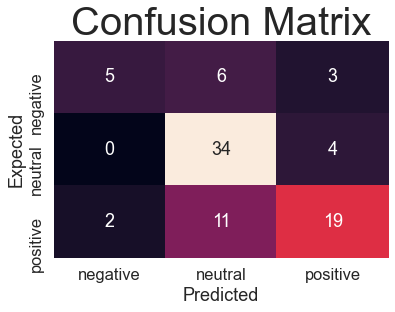

              precision    recall  f1-score   support

    negative     0.7143    0.3571    0.4762        14
     neutral     0.6667    0.8947    0.7640        38
    positive     0.7308    0.5938    0.6552        32

    accuracy                         0.6905        84
   macro avg     0.7039    0.6152    0.6318        84
weighted avg     0.6990    0.6905    0.6746        84

Accuracy = 0.6904761904761905


In [47]:
# Evaluation
metrics_report(rfmodel)

## XG BOOST

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
# Grid
xgbgrid = {'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 101, num = 25)],    # optimizing number of trees and tree depth
               'max_depth': [9,10,11,12,None],
              'subsample':[i/10 for i in range (7,11)],
               'colsample_bytree': [i/10 for i in range (7,11)],
                 'alpha:': [0.5,1,5]}
xgb = XGBClassifier()
modelOptimization(xgb,xgbgrid,xtrain,ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.3min finished


[15:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { alpha: } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:12:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Best Score: 
 0.6785165083672545
Model Best Parameters: 
 {'subsample': 0.7, 'n_estimators': 25, 'max_depth': 10, 'colsample_bytree': 1.0, 'alpha:': 5}


In [24]:
# Best XGBoost model
xgbmodel = XGBClassifier(subsample=0.7,n_estimators=25,max_depth=10,colsample_bytree=1,alpha=5)

[15:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


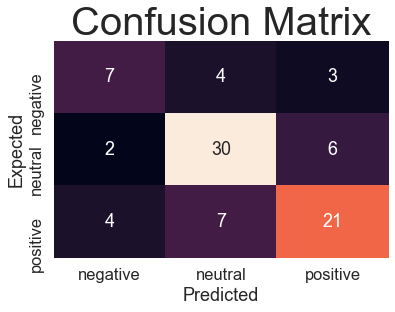

              precision    recall  f1-score   support

    negative     0.5385    0.5000    0.5185        14
     neutral     0.7317    0.7895    0.7595        38
    positive     0.7000    0.6562    0.6774        32

    accuracy                         0.6905        84
   macro avg     0.6567    0.6486    0.6518        84
weighted avg     0.6874    0.6905    0.6881        84

Accuracy = 0.6904761904761905


In [48]:
metrics_report(xgbmodel)